In [60]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
from matplotlib import pyplot as plt

In [61]:
fashion_mnist = keras.datasets.fashion_mnist
(train_image, train_labels), (test_image, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'trouser', 'pullover', 'Dress', 'Coat', 'Sandal', 'shirt', 'sneaker', 'bag','ankle boots']

In [62]:
train_image.shape

(60000, 28, 28)

In [63]:
len(train_labels)

60000

In [64]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [65]:
test_image.shape

(10000, 28, 28)

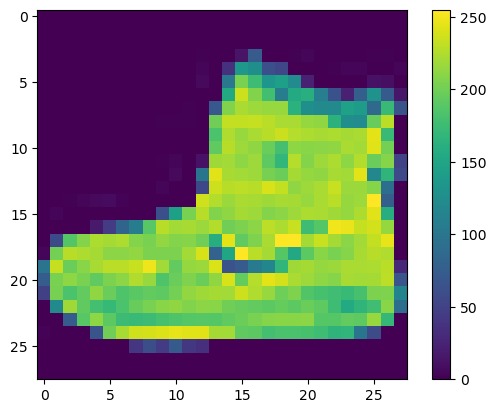

In [66]:
plt.figure()
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [67]:
train_image = train_image / 255.0
test_image = test_image / 255.0

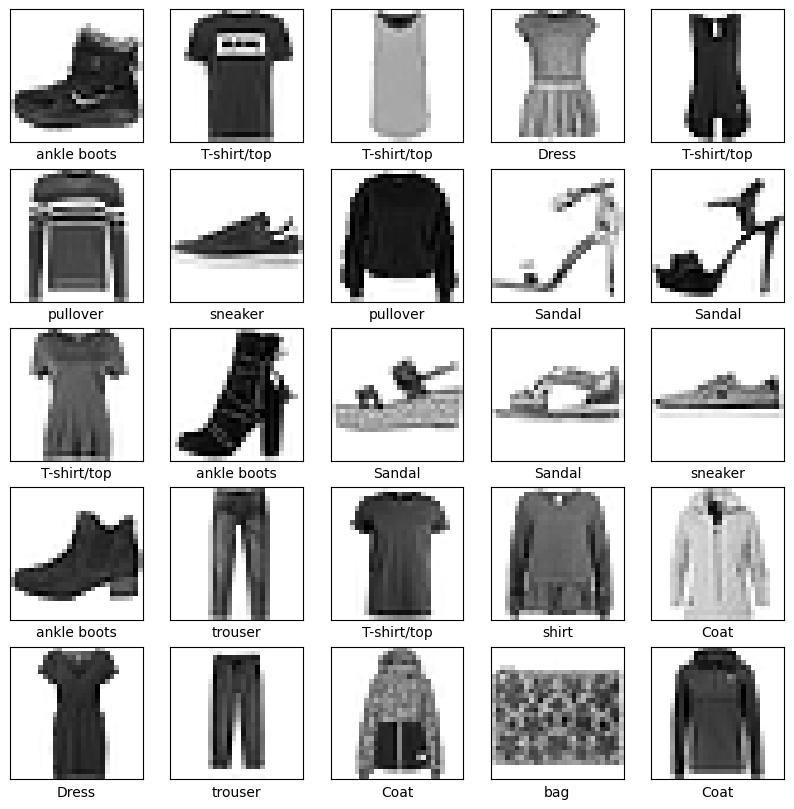

In [68]:
plt.figure(figsize= (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i], cmap= plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    

In [69]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation =tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softplus)
])

In [70]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy' ,
              metrics= ['accuracy'])

In [71]:
model.fit(train_image, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5214 - accuracy: 0.8199
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3864 - accuracy: 0.8613
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3411 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3208 - accuracy: 0.8820
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3014 - accuracy: 0.8888
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2844 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2755 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2632 - accuracy: 0.9020
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2532 - accuracy: 0.9051
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2

In [72]:
test_loss, test_acc = model.evaluate(test_image, test_labels)

print('Test accuracy', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8831
Test accuracy 0.8830999732017517


In [73]:
preddictions = model.predict(test_image)

 37/313 [==>...........................] - ETA: 0s 

313/313 [==============================] - 0s 1ms/step


In [74]:
preddictions[0]

array([1.5890341e-09, 2.5300440e-10, 1.3085457e-09, 1.0019011e-12,
       6.0623068e-10, 2.1950903e-04, 1.5496321e-10, 1.2569966e-04,
       6.3565707e-08, 4.2716190e-02], dtype=float32)

In [75]:
np.argmax(preddictions[0])

9

In [76]:
test_labels[0]

9

In [79]:
def plot_image(i, preddictions_array, true_label, img):
    preddictions_array, true_label, img = preddictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap =plt.cm.binary)

    predicted_label = np.argmax(preddictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(preddictions_array),
                                         class_names[true_label]),
               color=color)
def plot_value_array(i, preddictions_array, true_label):
    preddictions_array, true_label = preddictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(0), preddictions_array, color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(preddictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green') 

TypeError: 'int' object is not subscriptable

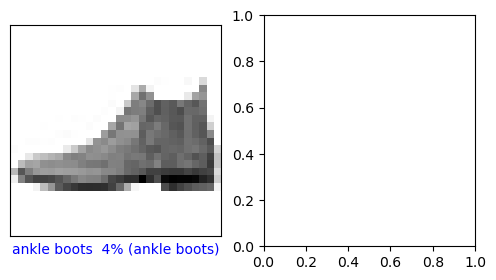

In [81]:
i =0
class_names = ['T-shirt/top', 'trouser', 'pullover', 'Dress', 'Coat', 'Sandal', 'shirt', 'sneaker', 'bag','ankle boots']  # Define your class names here
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, preddictions, test_labels, test_image)
plt.subplot(1,2,2)
plot_value_array(i, preddictions, true_label= 0)
plt.show()